In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [2]:
pop = pd.read_csv("countrypopulation.csv")
happiness = pd.read_csv("HappinessScore_SHJ.csv")

In [3]:
pop.head()

,Country,Population2018
0,Afghanistan,37172386.0
1,Albania,2866376.0
2,Algeria,42228429.0
3,American Samoa,55465.0
4,Andorra,77006.0


In [19]:
happiness.head()

,Country,Year,Score
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [20]:
happy2018 = happiness.loc[happiness["Year"]==2018]
happy2018["Score"].describe()

count    136.000000
mean       5.502134
std        1.103461
min        2.694303
25%        4.721326
50%        5.468088
75%        6.277691
max        7.858107
Name: Score, dtype: float64

In [7]:
mergedf = pd.merge(happy2018, pop, on="Country", how="inner")
mergedf.head()

,Country,Year,Score,Population2018
0,Afghanistan,2018,2.694303,37172386.0
1,Albania,2018,5.004403,2866376.0
2,Algeria,2018,5.043086,42228429.0
3,Argentina,2018,5.792797,44494502.0
4,Armenia,2018,5.062449,2951776.0


In [8]:
mergedf.count()

Country           119
Year              119
Score             119
Population2018    119
dtype: int64

In [9]:
mergedf.dtypes

Country            object
Year                int64
Score             float64
Population2018    float64
dtype: object

In [51]:
bins = [2,3,4,5,6,7,8]
labels = ["2-3", "3-4", "4-5", "5-6", "6-7", "7-8"]

mergedf["Range"] = pd.cut(mergedf["Score"], bins, labels=labels)
mergedf.head()

,Country,Year,Score,Population2018,Range
0,Afghanistan,2018,2.694303,37172386.0,2-3
1,Albania,2018,5.004403,2866376.0,5-6
2,Algeria,2018,5.043086,42228429.0,5-6
3,Argentina,2018,5.792797,44494502.0,5-6
4,Armenia,2018,5.062449,2951776.0,5-6


In [52]:
popsum = mergedf.groupby("Range")["Population2018"].sum()
popsum

Range
2-3    3.717239e+07
3-4    1.479205e+09
4-5    8.102980e+08
5-6    2.896988e+09
6-7    1.128037e+09
7-8    2.939941e+08
Name: Population2018, dtype: float64

In [53]:
bincountry = mergedf.groupby("Range")["Population2018"].count()
bincountry

Range
2-3     1
3-4     9
4-5    27
5-6    39
6-7    28
7-8    15
Name: Population2018, dtype: int64

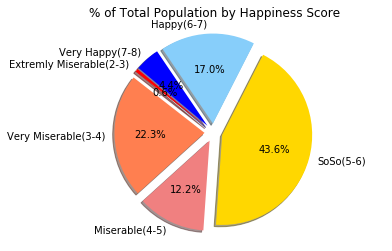

In [54]:
popsum = mergedf.groupby("Range")["Population2018"].sum()

labels = ["Extremly Miserable(2-3)", "Very Miserable(3-4)", "Miserable(4-5)", "SoSo(5-6)", "Happy(6-7)", 
          "Very Happy(7-8)"]
colors = ["red", "coral", "lightcoral", "gold", "lightskyblue", "blue"]
explode = [0.1,0.1,0.1,0.1,0.1,0.1]

plt.title("% of Total Population by Happiness Score")

plt.pie(popsum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.show()
